In [1]:
allure_etudier=2

In [50]:
import  sys

#LOCALISATION DES DONNEES
sys.path.insert(0, "C:/projets_python/diabolo")

import warnings
warnings.filterwarnings("ignore")

from math import *


#LIBRAIRIES PERSO
import etude_variable.MyLog as log
import etude_variable.jouer as jouer

import etude_variable.analyse as ana

# LIBRAIRIE PYHTON CLASSIQUES
import pandas as pd
import numpy as np
import matplotlib
import scipy
import platform

from collections import Counter

#ESTIMATEUR
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

from sklearn.ensemble import GradientBoostingClassifier



from scipy.stats import uniform
from scipy.stats import randint

#TRAINING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import dask_searchcv as dcv
from skopt.space import Real, Integer
from sklearn.model_selection import cross_validate

#Evaluateur
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.utils import class_weight

#outils
from dask.diagnostics import ProgressBar
import logging
from datetime import datetime


#Metriques
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  classification_report

#Outils

import time


#Graphique
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0


In [3]:
def lecture_data(Fichier, xnames, xindex_col, allure=1, mode_debug=0, avec_index=True):
    if avec_index==True:
        df = pd.read_csv(Fichier,  index_col=xindex_col,     sep=';',     names=xnames,               skipinitialspace=True,              encoding='Latin-1')
    else:
        df = pd.read_csv(Fichier,   index_col=None,  sep=';',                     names=xnames,                         skipinitialspace=True,     encoding='Latin-1')

    df = df.groupby("ALLURE")
    df = df.get_group(allure)
    #print(df.info())


    return df



In [4]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        print(start_time)
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        



In [5]:
def my_drop(df, col):
    if col in df:
        df.drop([col], axis=1, inplace=True)
    return df

In [6]:
def suppression_colonne(df2,allure):
    # df=my_drop(df, "PAR_AGE")
    print('Suppression colonnne ', allure)

    if  allure==0:

        df2.drop(["FIN_ligne"], axis=1, inplace=True)
        df2.drop(["PAR_NP"], axis=1, inplace=True)
        df2.drop(["cendre"], axis=1, inplace=True)
        df2.drop(["MUSIC_CHEVAL"], axis=1, inplace=True)
        df2.drop(["MUSIC_ENT"], axis=1, inplace=True)
        df2.drop(["MUSIC_JOC"], axis=1, inplace=True)
        df2.drop(["grande_piste"], axis=1, inplace=True)
        df2.drop(["PAR_VALEUR"], axis=1, inplace=True)
        df2.drop(["autostart"], axis=1, inplace=True)
        #df2.drop(["CO_DISTANCE"], axis=1, inplace=True)
        #df2.drop(["Point"], axis=1, inplace=True)
        df2.drop(["CHEVAL"], axis=1, inplace=True)
        df2.drop(["HIPPO"], axis=1, inplace=True)
        df2.drop(["NOM_JOC"], axis=1, inplace=True)
        df2.drop(["NOM_ENTR"], axis=1, inplace=True)
        df2.drop(["CO_PRIX"], axis=1, inplace=True)
        df2.drop(["Point"], axis=1, inplace=True)
        df2.drop(["Nb_partant"], axis=1, inplace=True)
        df2.drop(["PAR_PROPRIO"], axis=1, inplace=True)
        df2 = my_drop(df2, 'PAR_COTEDER')            
        
    if allure == 1:
        df2 = my_drop(df2, "POIDS")
        df2 = my_drop(df2, "CORDE")
   
    if allure==2:
        
        df2 = my_drop(df2, "MY_auto_start")
      #  df2 = my_drop(df2, "PAR_VICTOIRE_Q") 

    if allure == 3:
        df2 = my_drop(df2, "POIDS")
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")


    if allure == 4:
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")


    if allure == 5:
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")


    return df2

In [7]:
  # Lecture des données sans index
xnames = ['ALLURE', 'CO_DISTANCE',
              'CO_PRIX', 'HIPPO',
              'IDCOURSE', 'IDPARTCIPANT',
              'PAR_AGE', 'PAR_ARRIVE',
              'PAR_CARRIERE',
              'PAR_CARRIERE_Q',
              'PAR_CLASSE_AGE',
              'PAR_COTEDER',
              'PAR_ENT_ECART_GAGNANT',
              'PAR_ENT_RAPPORT_GAGNANT_M',
              'PAR_ENT_REU_PLACE',
              'PAR_ENT_REUSSITE_GAGNE',
              'PAR_ENT_VICTOIRE',
              'PAR_GAIN',
              'pAR_JOC_ECART_GAGNANT',
              'PAR_JOC_ECART_PLACE',
              'PAR_JOC_NB_COURSE',
              'PAR_JOC_PLACE_3P',
              'pAR_JOC_RAPPORT_GAGNANT_M',
              'PAR_JOC_REU_PLACE',
              'pAR_JOC_REUSSITE_GAGNE',
              'pAR_JOC_VICTOIRE',
              'PAR_NP',
              'PAR_NUM',
              'PAR_PLACE',
              'PAR_PLACE_Q',
              'PAR_REUSSITE_3P',
              'PAR_REUSSITE_GAGNE',
              'PAR_REUSSITE_QUINTE',
              'PAR_RUESSITE_PLACE',
              'autostart',
              'cendre',
              'grande_piste',
              'Point',
              'Nb_partant',
              'PAR_PROPRIO',
              'NOM_JOC',
              'NOM_ENTR',
              'POIDS',
              'CORDE', 'CHEVAL',
              'MUSIC_CHEVAL',
              'MUSIC_ENT',
              'MUSIC_JOC',
              'PAR_VALEUR',
              'PAR_ENT_ECART_PLACE',
              'PAR_VICTOIRE',
              'PAR_VICTOIRE_Q',
          'PAR_ENT_NB_COURSE',
              'FIN_ligne']


    

In [8]:
def transformation(df2,allure_etudier):
    #Filtre des données¶
    print('\n\n----------- TRANSFORMATION --------- AJOUT DE COLONNE------------\n')
    start_time=timer()
    df2=df2[df2.Point>0]
    df2 = df2[df2.PAR_COTEDER > 0]
   # df2 = df2[df2.CO_PRIX > 0]
    df2 = df2[df2.PAR_GAIN >= 0]
    df2 = df2[df2.PAR_GAIN < 1000000]
    df2 = df2[df2.PAR_ARRIVE > 0]  # On garde la ligne qui possede information arrivée
    df2 = df2.groupby("ALLURE")
    df2 = df2.get_group(allure_etudier)
    df2 = my_drop(df2, 'ALLURE')
    if allure_etudier == 2 or allure_etudier == 4 or allure_etudier == 5:
        df2 = df2[df2.POIDS > 20]
        df2 = df2[df2.POIDS < 80]
        
    #  on a lu les données avant l 'ajout de la colonne SELECTIOB
    df2['SELECTION2'] = df2['PAR_ARRIVE'].apply(assign_selection)
    df2 = my_drop(df2, 'PAR_ARRIVE')

    #df2['CHEVAL_QUINTE'] = df2.apply(lambda x: CHEVAL_QUINTE(x['PAR_CARRIERE_Q']), axis=1)    
    timer(start_time)
    return df2
   



In [9]:

def somme_note(df,num_course,cri):
   
    df.loc[df['IDCOURSE']==num_course,'p2018']  = df.loc[df['IDCOURSE']==num_course,'p2018'] +   df.loc[df['IDCOURSE']==num_course, cri ]    
    return df
        
def calcul_note(df, num_course, cri):
    
    valeur_critere=df.loc[df['IDCOURSE']==num_course,cri]  # selection critere    
    maxx=valeur_critere.max() #MAXI    
    
    if ((maxx[0])>0):            
        df.loc[df['IDCOURSE']==num_course, [cri[0]+'2']   ]= ( (df.loc[df['IDCOURSE']==num_course, [cri[0]+'2']]) /maxx[0]) *20             
    else:
        df.loc[df['IDCOURSE']==num_course,[cri[0]+'2'] ]=0
        
        
    df=somme_note(df,num_course, cri[0]+'2')



    return  df


#-------------------------------------------------------------------------------------------------------------------------------------------------------
def calcul_les_notes(df):
    i=0
    start_time=timer()
    df['p2018']=0

    #    sauvegarde des reelles valeurs
    df['PAR_ENT_ECART_GAGNANT2'] =    df['PAR_ENT_ECART_GAGNANT'] 
    df['PAR_ENT_RAPPORT_GAGNANT_M2']=df['PAR_ENT_RAPPORT_GAGNANT_M'] 
    df['PAR_ENT_REU_PLACE2'] =df['PAR_ENT_REU_PLACE'] 
    df['PAR_ENT_REUSSITE_GAGNE2'] =df['PAR_ENT_REUSSITE_GAGNE']
    df['PAR_ENT_VICTOIRE2'] =df['PAR_ENT_VICTOIRE']
    df['PAR_ENT_NB_COURSE2'] =df['PAR_ENT_NB_COURSE']
    df['pAR_JOC_ECART_GAGNANT2'] =df['pAR_JOC_ECART_GAGNANT']
    df['pAR_JOC_RAPPORT_GAGNANT_M2'] =df['pAR_JOC_RAPPORT_GAGNANT_M'] 
    df['PAR_JOC_REU_PLACE2'] =df['PAR_JOC_REU_PLACE'] 
    df['pAR_JOC_REUSSITE_GAGNE2'] =df['pAR_JOC_REUSSITE_GAGNE']
    df['pAR_JOC_VICTOIRE2'] =df['pAR_JOC_VICTOIRE'] 
    df['PAR_JOC_ECART_PLACE2'] =df['PAR_JOC_ECART_PLACE'] 
    df['PAR_JOC_NB_COURSE2'] =df['PAR_JOC_NB_COURSE']
    df['PAR_JOC_PLACE_3P2'] =df['PAR_JOC_PLACE_3P']
    df['PAR_REUSSITE_GAGNE2'] =df['PAR_REUSSITE_GAGNE']
    df['PAR_RUESSITE_PLACE2'] =df['PAR_RUESSITE_PLACE']
    df['PAR_REUSSITE_3P2'] =df['PAR_REUSSITE_3P'] 
    df['PAR_CARRIERE2'] =df['PAR_CARRIERE'] 
    df['PAR_CARRIERE_Q2'] =df['PAR_CARRIERE_Q'] 
    df['PAR_GAIN2'] =df['PAR_GAIN'] 
    df['PAR_PLACE2'] =df['PAR_PLACE'] 
    df['PAR_PLACE_Q2'] =df['PAR_PLACE_Q']
    df['PAR_CLASSE_AGE2'] =df['PAR_CLASSE_AGE']
    df['PAR_VICTOIRE2'] =df['PAR_VICTOIRE']
    df['PAR_REUSSITE_QUINTE2'] =df['PAR_REUSSITE_QUINTE']
    df['PAR_VICTOIRE_Q2'] =df['PAR_VICTOIRE_Q']
    
    
    
    for n  in df.groupby(['IDCOURSE'],axis=0):
        nc=n[0]
        if math.fmod(i,500)==0 or i<20:
            print("    print(N° ",i,timer(start_time))
            #df= calcul_note(df, nc, ['PAR_CARRIERE'] )
        df= calcul_note(df, nc, ['PAR_ENT_ECART_GAGNANT'] )
        df= calcul_note(df, nc, ['PAR_ENT_RAPPORT_GAGNANT_M'] )
        df= calcul_note(df, nc, ['PAR_ENT_REU_PLACE'] )
        df= calcul_note(df, nc, ['PAR_ENT_REUSSITE_GAGNE'] )
        df= calcul_note(df, nc, ['PAR_ENT_VICTOIRE'] ) 
        df= calcul_note(df, nc, ['PAR_ENT_NB_COURSE'] )   
    
        df= calcul_note(df, nc, ['pAR_JOC_ECART_GAGNANT'] )
        df= calcul_note(df, nc, ['pAR_JOC_RAPPORT_GAGNANT_M'] )
        df= calcul_note(df, nc, ['PAR_JOC_REU_PLACE'] )
        
        df= calcul_note(df, nc, ['pAR_JOC_REUSSITE_GAGNE'] )
        df= calcul_note(df, nc, ['pAR_JOC_VICTOIRE'] )    
        df= calcul_note(df, nc, ['PAR_JOC_ECART_PLACE'] )
        df= calcul_note(df, nc, ['PAR_JOC_NB_COURSE'] )    
        df= calcul_note(df, nc, ['PAR_JOC_PLACE_3P'] )    
    
        df= calcul_note(df, nc, ['PAR_REUSSITE_GAGNE'] )
        df= calcul_note(df, nc, ['PAR_RUESSITE_PLACE'] )
        df= calcul_note(df, nc, ['PAR_REUSSITE_3P'] )    
        df= calcul_note(df, nc, ['PAR_CARRIERE'] )
        df= calcul_note(df, nc, ['PAR_CARRIERE_Q'] )
        df= calcul_note(df, nc, ['PAR_GAIN'] )
        df= calcul_note(df, nc, ['PAR_PLACE'] )
        df= calcul_note(df, nc, ['PAR_PLACE_Q'] )
        df= calcul_note(df, nc, ['PAR_CLASSE_AGE'] )
        df= calcul_note(df, nc, ['PAR_VICTOIRE'] )
        df= calcul_note(df, nc, ['PAR_REUSSITE_QUINTE'] )
        df= calcul_note(df, nc, ['PAR_VICTOIRE_Q'] )
      
        i=i+1
   
            

    return df

In [10]:
def nettoyer_Nan(df):
    df[['PAR_ENT_ECART_GAGNANT']] = df[['PAR_ENT_ECART_GAGNANT']].fillna( df[['PAR_ENT_ECART_GAGNANT']].mean())
    df[['PAR_ENT_RAPPORT_GAGNANT_M']] = df[['PAR_ENT_RAPPORT_GAGNANT_M']].fillna( df[['PAR_ENT_RAPPORT_GAGNANT_M']].mean())
    df[['PAR_ENT_REU_PLACE']] = df[['PAR_ENT_REU_PLACE']].fillna( df[['PAR_ENT_REU_PLACE']].mean())
    df[['PAR_ENT_REUSSITE_GAGNE']] = df[['PAR_ENT_REUSSITE_GAGNE']].fillna( df[['PAR_ENT_REUSSITE_GAGNE']].mean())
    df[['PAR_ENT_VICTOIRE']] = df[['PAR_ENT_VICTOIRE']].fillna( df[['PAR_ENT_VICTOIRE']].mean())
    df[['PAR_ENT_NB_COURSE']] = df[['PAR_ENT_NB_COURSE']].fillna( df[['PAR_ENT_NB_COURSE']].mean())
    
    df[['pAR_JOC_ECART_GAGNANT']] = df[['pAR_JOC_ECART_GAGNANT']].fillna( df[['pAR_JOC_ECART_GAGNANT']].mean())
    df[['pAR_JOC_RAPPORT_GAGNANT_M']] = df[['pAR_JOC_RAPPORT_GAGNANT_M']].fillna( df[['pAR_JOC_RAPPORT_GAGNANT_M']].mean())
    df[['PAR_JOC_REU_PLACE']] = df[['PAR_JOC_REU_PLACE']].fillna( df[['PAR_JOC_REU_PLACE']].mean())
    df[['pAR_JOC_REUSSITE_GAGNE']] = df[['pAR_JOC_REUSSITE_GAGNE']].fillna( df[['pAR_JOC_REUSSITE_GAGNE']].mean())
    df[['pAR_JOC_VICTOIRE']] = df[['pAR_JOC_VICTOIRE']].fillna( df[['pAR_JOC_VICTOIRE']].mean())
    df[['PAR_JOC_ECART_PLACE']] = df[['PAR_JOC_ECART_PLACE']].fillna( df[['PAR_JOC_ECART_PLACE']].mean())
    df[['PAR_JOC_NB_COURSE']] = df[['PAR_JOC_NB_COURSE']].fillna( df[['PAR_JOC_NB_COURSE']].mean())
    df[['PAR_JOC_PLACE_3P']] = df[['PAR_JOC_PLACE_3P']].fillna( df[['PAR_JOC_PLACE_3P']].mean())
    df['PAR_RUESSITE_PLACE'] = df['PAR_RUESSITE_PLACE'].fillna( df['PAR_RUESSITE_PLACE'].mean())
    df[['PAR_REUSSITE_GAGNE']] = df[['PAR_REUSSITE_GAGNE']].fillna( 0)
    df[['PAR_REUSSITE_3P']] = df[['PAR_REUSSITE_3P']].fillna( df[['PAR_REUSSITE_3P']].mean())
    df[['PAR_CARRIERE']] = df[['PAR_CARRIERE']].fillna( df[['PAR_CARRIERE']].mean())
    df[['PAR_CARRIERE_Q']] = df[['PAR_CARRIERE_Q']].fillna( df[['PAR_CARRIERE_Q']].mean())
    df[['PAR_GAIN']] = df[['PAR_GAIN']].fillna( df[['PAR_GAIN']].mean())    
    df[['PAR_PLACE']] = df[['PAR_PLACE']].fillna( df[['PAR_PLACE']].mean())
    df[['PAR_PLACE_Q']] = df[['PAR_PLACE_Q']].fillna( df[['PAR_PLACE_Q']].mean())
    df[['PAR_CLASSE_AGE']] = df[['PAR_CLASSE_AGE']].fillna( df[['PAR_CLASSE_AGE']].mean())
    df[['PAR_POINT']] = df[['PAR_POINT']].fillna( df[['PAR_POINT']].mean())
    df[['PAR_REUSSITE_QUINTE']] = df[['PAR_REUSSITE_QUINTE']].fillna( df[['PAR_REUSSITE_QUINTE']].mean())
    df[['PAR_VICTOIRE_Q']] = df[['PAR_VICTOIRE_Q']].fillna( df[['PAR_VICTOIRE_Q']].mean())
        
    return df


import math
def relation_1(a,b):
    if b==0:
        return 0
    else:
        return (a/b)*20
    
#---------------------------------------------------------------------------------------------------------------------

    



In [11]:
# Creating bins for the win column
def assign_selection(W):
    if W <=4:
        return 1
    else:
        return 0
    

index_col = ['IDPARTCIPANT', 'IDCOURSE']
start_time=timer()
df = lecture_data('d:\data_diabolo.csv', xnames, xindex_col=index_col, allure=allure_etudier, avec_index=False)
df = df.groupby("ALLURE")
df = df.get_group(allure_etudier)
timer(start_time)

2018-07-05 22:22:14.825723

 Time taken: 0 hours 0 minutes and 3.03 seconds.


In [12]:
df2=transformation(df,allure_etudier)
df2=calcul_les_notes(df2)
    





----------- TRANSFORMATION --------- AJOUT DE COLONNE------------

2018-07-05 22:22:17.867669

 Time taken: 0 hours 0 minutes and 0.48 seconds.
2018-07-05 22:22:18.348415

 Time taken: 0 hours 0 minutes and 0.16 seconds.
    print(N°  0 None

 Time taken: 0 hours 0 minutes and 1.16 seconds.
    print(N°  1 None

 Time taken: 0 hours 0 minutes and 1.48 seconds.
    print(N°  2 None

 Time taken: 0 hours 0 minutes and 1.8 seconds.
    print(N°  3 None

 Time taken: 0 hours 0 minutes and 2.11 seconds.
    print(N°  4 None

 Time taken: 0 hours 0 minutes and 2.43 seconds.
    print(N°  5 None

 Time taken: 0 hours 0 minutes and 2.73 seconds.
    print(N°  6 None

 Time taken: 0 hours 0 minutes and 3.04 seconds.
    print(N°  7 None

 Time taken: 0 hours 0 minutes and 3.52 seconds.
    print(N°  8 None

 Time taken: 0 hours 0 minutes and 3.81 seconds.
    print(N°  9 None

 Time taken: 0 hours 0 minutes and 4.1 seconds.
    print(N°  10 None

 Time taken: 0 hours 0 minutes and 4.41 second

In [13]:
df2.info()
df3 = df2.copy()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 139555 entries, 102 to 490399
Data columns (total 80 columns):
CO_DISTANCE                   139555 non-null int64
CO_PRIX                       139555 non-null int64
HIPPO                         139555 non-null int64
IDCOURSE                      139555 non-null int64
IDPARTCIPANT                  139555 non-null int64
PAR_AGE                       139555 non-null int64
PAR_CARRIERE                  139555 non-null int64
PAR_CARRIERE_Q                139555 non-null int64
PAR_CLASSE_AGE                139555 non-null int64
PAR_COTEDER                   139555 non-null int64
PAR_ENT_ECART_GAGNANT         139555 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M     139555 non-null float64
PAR_ENT_REU_PLACE             139555 non-null float64
PAR_ENT_REUSSITE_GAGNE        139555 non-null float64
PAR_ENT_VICTOIRE              139555 non-null int64
PAR_GAIN                      139555 non-null float64
pAR_JOC_ECART_GAGNANT         139555 non-null i

In [14]:
df3.head(10)

,CO_DISTANCE,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,...,PAR_REUSSITE_3P2,PAR_CARRIERE2,PAR_CARRIERE_Q2,PAR_GAIN2,PAR_PLACE2,PAR_PLACE_Q2,PAR_CLASSE_AGE2,PAR_VICTOIRE2,PAR_REUSSITE_QUINTE2,PAR_VICTOIRE_Q2
102,0,23151,2,1622,19930,8,22,0,0,23,...,7.95455,20.000000,0.0,0.0,20.0,0.0,0.0,20.0,0.0,0.0
103,0,23151,2,1622,19929,9,3,0,0,6,...,0.00000,2.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0,23151,2,1622,19928,5,3,0,0,56,...,0.00000,2.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0,23151,2,1622,19927,5,2,0,0,5,...,12.50000,1.818182,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
106,0,23151,2,1622,19926,6,6,0,0,5,...,12.50000,5.454545,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
107,0,23151,2,1622,19925,5,2,0,0,16,...,0.00000,1.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0,23151,2,1622,19924,7,5,0,0,3,...,20.00000,4.545455,0.0,0.0,12.0,0.0,0.0,10.0,0.0,0.0
109,0,23151,2,1622,19923,6,5,0,0,17,...,10.00000,4.545455,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
110,0,23151,2,1622,19922,7,3,0,0,23,...,0.00000,2.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0,23151,2,1622,19921,4,2,0,0,21,...,0.00000,1.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
xnames2 = [
              'CO_PRIX', 'HIPPO',
              'IDCOURSE', 'IDPARTCIPANT',
              'PAR_AGE',
              'PAR_CARRIERE',
              'PAR_CARRIERE_Q',
              'PAR_CLASSE_AGE',
              'PAR_COTEDER',
              'PAR_ENT_ECART_GAGNANT',
              'PAR_ENT_RAPPORT_GAGNANT_M',
              'PAR_ENT_REU_PLACE',
              'PAR_ENT_REUSSITE_GAGNE',
              'PAR_ENT_VICTOIRE',
              'PAR_GAIN',
              'pAR_JOC_ECART_GAGNANT',
              'PAR_JOC_ECART_PLACE',
              'PAR_JOC_NB_COURSE',
              'PAR_JOC_PLACE_3P',
              'pAR_JOC_RAPPORT_GAGNANT_M',
              'PAR_JOC_REU_PLACE',
              'pAR_JOC_REUSSITE_GAGNE',
              'pAR_JOC_VICTOIRE',
              'PAR_NP',
              'PAR_NUM',
              'PAR_PLACE',
              'PAR_PLACE_Q',
              'PAR_REUSSITE_3P',
              'PAR_REUSSITE_GAGNE',
              'PAR_REUSSITE_QUINTE',
              'PAR_RUESSITE_PLACE',
              'autostart',
              'cendre',
              'grande_piste',
              'Point',
              'Nb_partant',
              'PAR_PROPRIO',
              'NOM_JOC',
              'NOM_ENTR',
              'POIDS',
              'CORDE', 'CHEVAL',
              'MUSIC_CHEVAL',
              'MUSIC_ENT',
              'MUSIC_JOC',
              'PAR_VALEUR',
              'PAR_ENT_ECART_PLACE',
              'PAR_VICTOIRE',
              'PAR_VICTOIRE_Q',
              'PAR_ENT_NB_COURSE',
              'FIN_ligne',
               'SELECTION2',
               'p2018',
               'PAR_ENT_ECART_GAGNANT2',
                'PAR_ENT_RAPPORT_GAGNANT_M2',
                'PAR_ENT_REU_PLACE2',
                'PAR_ENT_REUSSITE_GAGNE2',
                'PAR_ENT_VICTOIRE2',
                'PAR_ENT_NB_COURSE2',
                'pAR_JOC_ECART_GAGNANT2',
                'pAR_JOC_RAPPORT_GAGNANT_M2',
                'PAR_JOC_REU_PLACE2',
                'pAR_JOC_REUSSITE_GAGNE2',
                'pAR_JOC_VICTOIRE2',
                'PAR_JOC_ECART_PLACE2',
                'PAR_JOC_NB_COURSE2',
                'PAR_JOC_PLACE_3P2',
                'PAR_REUSSITE_GAGNE2',
                'PAR_RUESSITE_PLACE2',
                'PAR_REUSSITE_3P2',
                'PAR_CARRIERE2',
                'PAR_CARRIERE_Q2',
                'PAR_GAIN2',
                'PAR_PLACE2',
                'PAR_PLACE_Q2',
                'PAR_CLASSE_AGE2',
                'PAR_VICTOIRE2',
                'PAR_REUSSITE_QUINTE2','PAR_VICTOIRE_Q2']


if allure_etudier==1:
    df3.to_csv('d:\diabolo_1_note.csv',sep=';',columns =xnames2,encoding='utf-8')
if allure_etudier==2:
    df3.to_csv('d:\diabolo_2_note.csv',sep=';',columns =xnames2,encoding='utf-8')    
    

In [16]:
print(xnames2)
df3.head(10)

['CO_PRIX', 'HIPPO', 'IDCOURSE', 'IDPARTCIPANT', 'PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE', 'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_NP', 'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'autostart', 'cendre', 'grande_piste', 'Point', 'Nb_partant', 'PAR_PROPRIO', 'NOM_JOC', 'NOM_ENTR', 'POIDS', 'CORDE', 'CHEVAL', 'MUSIC_CHEVAL', 'MUSIC_ENT', 'MUSIC_JOC', 'PAR_VALEUR', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE', 'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'FIN_ligne', 'SELECTION2', 'p2018', 'PAR_ENT_ECART_GAGNANT2', 'PAR_ENT_RAPPORT_GAGNANT_M2', 'PAR_ENT_REU_PLACE2', 'PAR_ENT_REUSSITE_GAGNE2', 'PAR_ENT_VICTOIRE

,CO_DISTANCE,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,...,PAR_REUSSITE_3P2,PAR_CARRIERE2,PAR_CARRIERE_Q2,PAR_GAIN2,PAR_PLACE2,PAR_PLACE_Q2,PAR_CLASSE_AGE2,PAR_VICTOIRE2,PAR_REUSSITE_QUINTE2,PAR_VICTOIRE_Q2
102,0,23151,2,1622,19930,8,22,0,0,23,...,7.95455,20.000000,0.0,0.0,20.0,0.0,0.0,20.0,0.0,0.0
103,0,23151,2,1622,19929,9,3,0,0,6,...,0.00000,2.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0,23151,2,1622,19928,5,3,0,0,56,...,0.00000,2.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0,23151,2,1622,19927,5,2,0,0,5,...,12.50000,1.818182,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
106,0,23151,2,1622,19926,6,6,0,0,5,...,12.50000,5.454545,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
107,0,23151,2,1622,19925,5,2,0,0,16,...,0.00000,1.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0,23151,2,1622,19924,7,5,0,0,3,...,20.00000,4.545455,0.0,0.0,12.0,0.0,0.0,10.0,0.0,0.0
109,0,23151,2,1622,19923,6,5,0,0,17,...,10.00000,4.545455,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
110,0,23151,2,1622,19922,7,3,0,0,23,...,0.00000,2.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0,23151,2,1622,19921,4,2,0,0,21,...,0.00000,1.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:

df2=pd.read_csv('d:\diabolo_2_note.csv',   sep=';',  names=xnames2,                         skipinitialspace=True,     encoding='utf-8')
df2=df2.drop(df2.index[0])
df2.head(10)


,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,...,PAR_REUSSITE_3P2,PAR_CARRIERE2,PAR_CARRIERE_Q2,PAR_GAIN2,PAR_PLACE2,PAR_PLACE_Q2,PAR_CLASSE_AGE2,PAR_VICTOIRE2,PAR_REUSSITE_QUINTE2,PAR_VICTOIRE_Q2
102.0,23151,2,1622,19930,8,22,0,0,23,0,...,7.95455,20.0,0.0,0.0,20.0,0.0,0.0,20.0,0.0,0.0
103.0,23151,2,1622,19929,9,3,0,0,6,0,...,0.0,2.727272727272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104.0,23151,2,1622,19928,5,3,0,0,56,0,...,0.0,2.727272727272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105.0,23151,2,1622,19927,5,2,0,0,5,10,...,12.5,1.8181818181818183,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
106.0,23151,2,1622,19926,6,6,0,0,5,4,...,12.5,5.454545454545454,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
107.0,23151,2,1622,19925,5,2,0,0,16,12,...,0.0,1.8181818181818183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108.0,23151,2,1622,19924,7,5,0,0,3,7,...,20.0,4.545454545454545,0.0,0.0,12.0,0.0,0.0,10.0,0.0,0.0
109.0,23151,2,1622,19923,6,5,0,0,17,4,...,10.0,4.545454545454545,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
110.0,23151,2,1622,19922,7,3,0,0,23,8,...,0.0,2.727272727272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111.0,23151,2,1622,19921,4,2,0,0,21,14,...,0.0,1.8181818181818183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 139555 entries, 102.0 to 490399.0
Data columns (total 79 columns):
CO_PRIX                       139555 non-null object
HIPPO                         139555 non-null object
IDCOURSE                      139555 non-null object
IDPARTCIPANT                  139555 non-null object
PAR_AGE                       139555 non-null object
PAR_CARRIERE                  139555 non-null object
PAR_CARRIERE_Q                139555 non-null object
PAR_CLASSE_AGE                139555 non-null object
PAR_COTEDER                   139555 non-null object
PAR_ENT_ECART_GAGNANT         139555 non-null object
PAR_ENT_RAPPORT_GAGNANT_M     139555 non-null object
PAR_ENT_REU_PLACE             139555 non-null object
PAR_ENT_REUSSITE_GAGNE        139555 non-null object
PAR_ENT_VICTOIRE              139555 non-null object
PAR_GAIN                      139555 non-null object
pAR_JOC_ECART_GAGNANT         139555 non-null object
PAR_JOC_ECART_PLACE           139

In [34]:
#conversion
df2['CO_PRIX']=df2['CO_PRIX'].astype('int')
df2['HIPPO']=df2['HIPPO'].astype('int')
df2['IDCOURSE']=df2['IDCOURSE'].astype('int')
df2['IDPARTCIPANT']=df2['IDPARTCIPANT'].astype('int')
df2['PAR_AGE']=df2['PAR_AGE'].astype('int')

df2['PAR_CARRIERE']=df2['PAR_CARRIERE'].astype('float')
df2['PAR_CARRIERE']=df2['PAR_CARRIERE'].astype('int')
df2['PAR_CARRIERE2']=df2['PAR_CARRIERE2'].astype('float')
df2['PAR_CARRIERE2']=df2['PAR_CARRIERE2'].astype('int')



df2['PAR_CARRIERE_Q']=df2['PAR_CARRIERE_Q'].astype('float')
df2['PAR_CARRIERE_Q']=df2['PAR_CARRIERE_Q'].astype('int')
df2['PAR_CARRIERE_Q2']=df2['PAR_CARRIERE_Q2'].astype('float')
df2['PAR_CARRIERE_Q2']=df2['PAR_CARRIERE_Q2'].astype('int')


df2['PAR_CLASSE_AGE']=df2['PAR_CLASSE_AGE'].astype('float')
df2['PAR_CLASSE_AGE']=df2['PAR_CLASSE_AGE'].astype('int')
df2['PAR_CLASSE_AGE2']=df2['PAR_CLASSE_AGE2'].astype('float')
df2['PAR_CLASSE_AGE2']=df2['PAR_CLASSE_AGE2'].astype('int')


df2['PAR_COTEDER']=df2['PAR_COTEDER'].astype('float')
df2['PAR_COTEDER']=df2['PAR_COTEDER'].astype('int')


df2['PAR_ENT_ECART_GAGNANT']=df2['PAR_ENT_ECART_GAGNANT'].astype('float')
df2['PAR_ENT_ECART_GAGNANT2']=df2['PAR_ENT_ECART_GAGNANT2'].astype('float')



df2['PAR_ENT_RAPPORT_GAGNANT_M']=df2['PAR_ENT_RAPPORT_GAGNANT_M'].astype('float')
df2['PAR_ENT_RAPPORT_GAGNANT_M']=df2['PAR_ENT_RAPPORT_GAGNANT_M'].astype('int')
df2['PAR_ENT_RAPPORT_GAGNANT_M2']=df2['PAR_ENT_RAPPORT_GAGNANT_M2'].astype('float')



df2['PAR_ENT_REU_PLACE']=df2['PAR_ENT_REU_PLACE'].astype('float')
df2['PAR_ENT_REU_PLACE']=df2['PAR_ENT_REU_PLACE'].astype('int')
df2['PAR_ENT_REU_PLACE2']=df2['PAR_ENT_REU_PLACE2'].astype('float')

df2['PAR_ENT_REUSSITE_GAGNE']=df2['PAR_ENT_REUSSITE_GAGNE'].astype('float')
df2['PAR_ENT_REUSSITE_GAGNE']=df2['PAR_ENT_REUSSITE_GAGNE'].astype('int')
df2['PAR_ENT_REUSSITE_GAGNE2']=df2['PAR_ENT_REUSSITE_GAGNE2'].astype('float')


df2['PAR_ENT_VICTOIRE']=df2['PAR_ENT_VICTOIRE'].astype('float')
df2['PAR_ENT_VICTOIRE']=df2['PAR_ENT_VICTOIRE'].astype('int')
df2['PAR_ENT_VICTOIRE2']=df2['PAR_ENT_VICTOIRE2'].astype('float')

df2['PAR_GAIN']=df2['PAR_GAIN'].astype('float')
df2['PAR_GAIN']=df2['PAR_GAIN'].astype('int')
df2['PAR_GAIN2']=df2['PAR_GAIN2'].astype('float')


df2['pAR_JOC_ECART_GAGNANT']=df2['pAR_JOC_ECART_GAGNANT'].astype('float')
df2['pAR_JOC_ECART_GAGNANT']=df2['pAR_JOC_ECART_GAGNANT'].astype('int')
df2['pAR_JOC_ECART_GAGNANT2']=df2['pAR_JOC_ECART_GAGNANT2'].astype('float')

df2['PAR_JOC_ECART_PLACE']=df2['PAR_JOC_ECART_PLACE'].astype('float')
df2['PAR_JOC_ECART_PLACE']=df2['PAR_JOC_ECART_PLACE'].astype('int')
df2['PAR_JOC_ECART_PLACE2']=df2['PAR_JOC_ECART_PLACE2'].astype('float')

df2['PAR_JOC_NB_COURSE']=df2['PAR_JOC_NB_COURSE'].astype('float')
df2['PAR_JOC_NB_COURSE']=df2['PAR_JOC_NB_COURSE'].astype('int')
df2['PAR_JOC_NB_COURSE2']=df2['PAR_JOC_NB_COURSE2'].astype('float')

 
df2['PAR_JOC_PLACE_3P']=df2['PAR_JOC_PLACE_3P'].astype('float')
df2['PAR_JOC_PLACE_3P']=df2['PAR_JOC_PLACE_3P'].astype('int')
df2['PAR_JOC_PLACE_3P2']=df2['PAR_JOC_PLACE_3P2'].astype('float')

df2['pAR_JOC_RAPPORT_GAGNANT_M']=df2['pAR_JOC_RAPPORT_GAGNANT_M'].astype('float')
df2['pAR_JOC_RAPPORT_GAGNANT_M']=df2['pAR_JOC_RAPPORT_GAGNANT_M'].astype('int')
df2['pAR_JOC_RAPPORT_GAGNANT_M2']=df2['pAR_JOC_RAPPORT_GAGNANT_M2'].astype('float')

df2['PAR_JOC_REU_PLACE']=df2['PAR_JOC_REU_PLACE'].astype('float')
df2['PAR_JOC_REU_PLACE']=df2['PAR_JOC_REU_PLACE'].astype('int')
df2['PAR_JOC_REU_PLACE2']=df2['PAR_JOC_REU_PLACE2'].astype('float')


df2['pAR_JOC_REUSSITE_GAGNE']=df2['pAR_JOC_REUSSITE_GAGNE'].astype('float')
df2['pAR_JOC_REUSSITE_GAGNE']=df2['pAR_JOC_REUSSITE_GAGNE'].astype('int')
df2['pAR_JOC_REUSSITE_GAGNE2']=df2['pAR_JOC_REUSSITE_GAGNE2'].astype('float')

df2['pAR_JOC_VICTOIRE']=df2['pAR_JOC_VICTOIRE'].astype('float')
df2['pAR_JOC_VICTOIRE']=df2['pAR_JOC_VICTOIRE'].astype('int')
df2['pAR_JOC_VICTOIRE2']=df2['pAR_JOC_VICTOIRE2'].astype('float')

df2['PAR_NP']=df2['PAR_NP'].astype('float')
df2['PAR_NP']=df2['PAR_NP'].astype('int')


df2['PAR_NUM']=df2['PAR_NUM'].astype('float')
df2['PAR_NUM']=df2['PAR_NUM'].astype('int')


df2['PAR_PLACE']=df2['PAR_PLACE'].astype('float')
df2['PAR_PLACE']=df2['PAR_PLACE'].astype('int')
df2['PAR_PLACE2']=df2['PAR_PLACE2'].astype('float')
df2['PAR_PLACE2']=df2['PAR_PLACE2'].astype('int')


df2['PAR_PLACE_Q']=df2['PAR_PLACE_Q'].astype('float')
df2['PAR_PLACE_Q']=df2['PAR_PLACE_Q'].astype('int')
df2['PAR_PLACE_Q2']=df2['PAR_PLACE_Q2'].astype('float')
df2['PAR_PLACE_Q2']=df2['PAR_PLACE_Q2'].astype('int')


df2['PAR_REUSSITE_3P']=df2['PAR_REUSSITE_3P'].astype('float')
df2['PAR_REUSSITE_3P']=df2['PAR_REUSSITE_3P'].astype('int')
df2['PAR_REUSSITE_3P2']=df2['PAR_REUSSITE_3P2'].astype('float')

df2['PAR_REUSSITE_GAGNE']=df2['PAR_REUSSITE_GAGNE'].astype('float')
df2['PAR_REUSSITE_GAGNE']=df2['PAR_REUSSITE_GAGNE'].astype('int')
df2['PAR_REUSSITE_GAGNE2']=df2['PAR_REUSSITE_GAGNE2'].astype('float')




df2['PAR_REUSSITE_QUINTE']=df2['PAR_REUSSITE_QUINTE'].astype('float')
df2['PAR_REUSSITE_QUINTE']=df2['PAR_REUSSITE_QUINTE'].astype('int')
df2['PAR_REUSSITE_QUINTE2']=df2['PAR_REUSSITE_QUINTE2'].astype('float')

df2['PAR_RUESSITE_PLACE']=df2['PAR_RUESSITE_PLACE'].astype('float')
df2['PAR_RUESSITE_PLACE']=df2['PAR_RUESSITE_PLACE'].astype('int')
df2['PAR_RUESSITE_PLACE2']=df2['PAR_RUESSITE_PLACE2'].astype('float')

df2['autostart']=df2['autostart'].astype('float')
df2['autostart']=df2['autostart'].astype('int')



df2['cendre']=df2['cendre'].astype('float')
df2['cendre']=df2['cendre'].astype('int')

df2['grande_piste']=df2['grande_piste'].astype('float')
df2['grande_piste']=df2['grande_piste'].astype('int')


df2['Point']=df2['Point'].astype('float')
df2['Point']=df2['Point'].astype('int')

df2['Nb_partant']=df2['Nb_partant'].astype('float')
df2['Nb_partant']=df2['Nb_partant'].astype('int')

df2['PAR_PROPRIO']=df2['PAR_PROPRIO'].astype('float')
df2['PAR_PROPRIO']=df2['PAR_PROPRIO'].astype('int')

df2['NOM_JOC']=df2['NOM_JOC'].astype('float')
df2['NOM_JOC']=df2['NOM_JOC'].astype('int')

df2['NOM_ENTR']=df2['NOM_ENTR'].astype('float')
df2['NOM_ENTR']=df2['NOM_ENTR'].astype('int')

df2['POIDS']=df2['POIDS'].astype('float')
df2['POIDS']=df2['POIDS'].astype('int')


df2['CORDE']=df2['CORDE'].astype('float')
df2['CORDE']=df2['CORDE'].astype('int')

df2['CHEVAL']=df2['CHEVAL'].astype('float')
df2['CHEVAL']=df2['CHEVAL'].astype('int')

df2['MUSIC_CHEVAL']=df2['MUSIC_CHEVAL'].astype('str')
df2['MUSIC_ENT']=df2['MUSIC_ENT'].astype('str')
df2['MUSIC_JOC']=df2['MUSIC_JOC'].astype('str')


df2['PAR_VALEUR']=df2['PAR_VALEUR'].astype('float')
df2['PAR_VALEUR']=df2['PAR_VALEUR'].astype('int')

df2['PAR_ENT_ECART_PLACE']=df2['PAR_ENT_ECART_PLACE'].astype('float')
df2['PAR_ENT_ECART_PLACE']=df2['PAR_ENT_ECART_PLACE'].astype('int')

df2['PAR_VICTOIRE']=df2['PAR_VICTOIRE'].astype('float')
df2['PAR_VICTOIRE']=df2['PAR_VICTOIRE'].astype('int')
df2['PAR_VICTOIRE2']=df2['PAR_VICTOIRE2'].astype('float')
df2['PAR_VICTOIRE2']=df2['PAR_VICTOIRE2'].astype('int')


df2['PAR_VICTOIRE_Q']=df2['PAR_VICTOIRE_Q'].astype('float')
df2['PAR_VICTOIRE_Q']=df2['PAR_VICTOIRE_Q'].astype('int')
df2['PAR_VICTOIRE_Q2']=df2['PAR_VICTOIRE_Q2'].astype('float')
df2['PAR_VICTOIRE_Q2']=df2['PAR_VICTOIRE_Q2'].astype('int')


df2['PAR_ENT_NB_COURSE']=df2['PAR_ENT_NB_COURSE'].astype('float')
df2['PAR_ENT_NB_COURSE']=df2['PAR_ENT_NB_COURSE'].astype('int')
df2['PAR_ENT_NB_COURSE2']=df2['PAR_ENT_NB_COURSE2'].astype('float')
df2['PAR_ENT_NB_COURSE2']=df2['PAR_ENT_NB_COURSE2'].astype('int')

df2['FIN_ligne']=df2['FIN_ligne'].astype('str')

df2['SELECTION2']=df2['SELECTION2'].astype('float')
df2['SELECTION2']=df2['SELECTION2'].astype('int')

df2['p2018']=df2['p2018'].astype('float')
df2['p2018']=df2['p2018'].astype('int')

df2['PAR_REUSSITE_QUINTE']=df2['PAR_REUSSITE_QUINTE'].astype('float')

df2['PAR_REUSSITE_QUINTE2']=df2['PAR_REUSSITE_QUINTE2'].astype('float')
df2['PAR_REUSSITE_QUINTE2']=df2['PAR_REUSSITE_QUINTE2'].astype('int')

df2['PAR_VICTOIRE_Q']=df2['PAR_VICTOIRE_Q'].astype('float')
df2['PAR_VICTOIRE_Q']=df2['PAR_VICTOIRE_Q'].astype('int')

df2['PAR_VICTOIRE_Q2']=df2['PAR_VICTOIRE_Q2'].astype('float')
df2['PAR_VICTOIRE_Q2']=df2['PAR_VICTOIRE_Q2'].astype('int')

                

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 139555 entries, 102.0 to 490399.0
Data columns (total 79 columns):
CO_PRIX                       139555 non-null int32
HIPPO                         139555 non-null int32
IDCOURSE                      139555 non-null int32
IDPARTCIPANT                  139555 non-null int32
PAR_AGE                       139555 non-null int32
PAR_CARRIERE                  139555 non-null int32
PAR_CARRIERE_Q                139555 non-null int32
PAR_CLASSE_AGE                139555 non-null int32
PAR_COTEDER                   139555 non-null int32
PAR_ENT_ECART_GAGNANT         139555 non-null float64
PAR_ENT_RAPPORT_GAGNANT_M     139555 non-null int32
PAR_ENT_REU_PLACE             139555 non-null int32
PAR_ENT_REUSSITE_GAGNE        139555 non-null int32
PAR_ENT_VICTOIRE              139555 non-null int32
PAR_GAIN                      139555 non-null int32
pAR_JOC_ECART_GAGNANT         139555 non-null int32
PAR_JOC_ECART_PLACE           139555 non-null i

In [36]:
#df2=transformationPoint(df2,allure_etudier)
#df2, critere_scale = encodage(df2)
df2.head(100)

,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,...,PAR_REUSSITE_3P2,PAR_CARRIERE2,PAR_CARRIERE_Q2,PAR_GAIN2,PAR_PLACE2,PAR_PLACE_Q2,PAR_CLASSE_AGE2,PAR_VICTOIRE2,PAR_REUSSITE_QUINTE2,PAR_VICTOIRE_Q2
102.0,23151,2,1622,19930,8,22,0,0,23,0.0,...,7.954550,20,0,0.0,20,0,0,20,0,0
103.0,23151,2,1622,19929,9,3,0,0,6,0.0,...,0.000000,2,0,0.0,0,0,0,0,0,0
104.0,23151,2,1622,19928,5,3,0,0,56,0.0,...,0.000000,2,0,0.0,0,0,0,0,0,0
105.0,23151,2,1622,19927,5,2,0,0,5,10.0,...,12.500000,1,0,0.0,0,0,0,10,0,0
106.0,23151,2,1622,19926,6,6,0,0,5,4.0,...,12.500000,5,0,0.0,12,0,0,0,0,0
107.0,23151,2,1622,19925,5,2,0,0,16,12.0,...,0.000000,1,0,0.0,0,0,0,0,0,0
108.0,23151,2,1622,19924,7,5,0,0,3,7.0,...,20.000000,4,0,0.0,12,0,0,10,0,0
109.0,23151,2,1622,19923,6,5,0,0,17,4.0,...,10.000000,4,0,0.0,8,0,0,0,0,0
110.0,23151,2,1622,19922,7,3,0,0,23,8.0,...,0.000000,2,0,0.0,0,0,0,0,0,0
111.0,23151,2,1622,19921,4,2,0,0,21,14.0,...,0.000000,1,0,0.0,0,0,0,0,0,0


In [37]:
df2 = suppression_colonne(df2=df2,allure=0)
df2 = suppression_colonne(df2=df2,allure=allure_etudier)


Suppression colonnne  0
Suppression colonnne  2


In [38]:
df2.head(5)

,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,...,PAR_REUSSITE_3P2,PAR_CARRIERE2,PAR_CARRIERE_Q2,PAR_GAIN2,PAR_PLACE2,PAR_PLACE_Q2,PAR_CLASSE_AGE2,PAR_VICTOIRE2,PAR_REUSSITE_QUINTE2,PAR_VICTOIRE_Q2
102.0,1622,19930,8,22,0,0,0.0,7,0,0,...,7.95455,20,0,0.0,20,0,0,20,0,0
103.0,1622,19929,9,3,0,0,0.0,0,0,0,...,0.00000,2,0,0.0,0,0,0,0,0,0
104.0,1622,19928,5,3,0,0,0.0,0,0,0,...,0.00000,2,0,0.0,0,0,0,0,0,0
105.0,1622,19927,5,2,0,0,10.0,12,0,0,...,12.50000,1,0,0.0,0,0,0,10,0,0
106.0,1622,19926,6,6,0,0,4.0,6,0,0,...,12.50000,5,0,0.0,12,0,0,0,0,0


In [39]:
df2[['SELECTION2']].head(5)



,SELECTION2
102.0,0
103.0,0
104.0,0
105.0,1
106.0,1


# Definition de la cible

In [40]:
# Creating bins for the win column
def assign_selection2(W):
    if W==1:
        return 1
    if W==0:
        return 0
    
    

Lib_features_df = df2.columns
xdata = df2.values

df_gagnant = pd.DataFrame(data=xdata, columns=Lib_features_df)
df_gagnant['SELECTION'] = df_gagnant['SELECTION2'].apply(assign_selection2)
df_gagnant.drop(["SELECTION2"], axis=1, inplace=True)

df_gagnant = df_gagnant.set_index(index_col)

df_gagnant_len = len(df_gagnant.columns) - 1
Lib_features = df_gagnant.columns[:df_gagnant_len]

feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<
log.traceLogdebug("Features                   : %s " % Lib_features, " <<<<************")

print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES ",Lib_features)
print("(3) response column ",response_column)
# df_gagnant, feature_columns, response_column, ratio SONT DEFINI


(1) Shape df_gagnant   (139555, 59) 

(2) FEATURES  Index(['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',
       'POIDS', 'CORDE', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE',
       'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018',
       'PAR_ENT_ECART_GAGNANT2', 'PAR_ENT_RAPPORT_GAGNANT_M2',
       'PAR_ENT_REU_PLACE2', 'PAR_ENT_REUSSITE_GAGNE2', 'PAR_ENT_VICTOIRE2',
       'PAR_ENT_NB_COURSE2', 'pAR_JOC_ECART_GAGNANT2',
       'pAR_JOC_RAPPORT_GAGNANT_M2', 'PAR_JOC_REU_PLACE2',
       'pAR_J

In [41]:
print(df_gagnant['PAR_AGE'].mean())


4.531381892443839


# Suppression de colonnes

In [42]:
#df_gagnant_len = len(df_gagnant.columns) - 1
#Lib_features = df_gagnant.columns[:df_gagnant_len]
feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
#response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<
log.traceLogdebug("Features                   : %s " % Lib_features, " <<<<************")

print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES\n ",Lib_features,"\n")
print("(3) response column ",response_column,"\n")
df_gagnant.info()
    

(1) Shape df_gagnant   (139555, 59) 

(2) FEATURES
  Index(['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',
       'POIDS', 'CORDE', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE',
       'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018',
       'PAR_ENT_ECART_GAGNANT2', 'PAR_ENT_RAPPORT_GAGNANT_M2',
       'PAR_ENT_REU_PLACE2', 'PAR_ENT_REUSSITE_GAGNE2', 'PAR_ENT_VICTOIRE2',
       'PAR_ENT_NB_COURSE2', 'pAR_JOC_ECART_GAGNANT2',
       'pAR_JOC_RAPPORT_GAGNANT_M2', 'PAR_JOC_REU_PLACE2',
       'pAR_

# CORRELATION


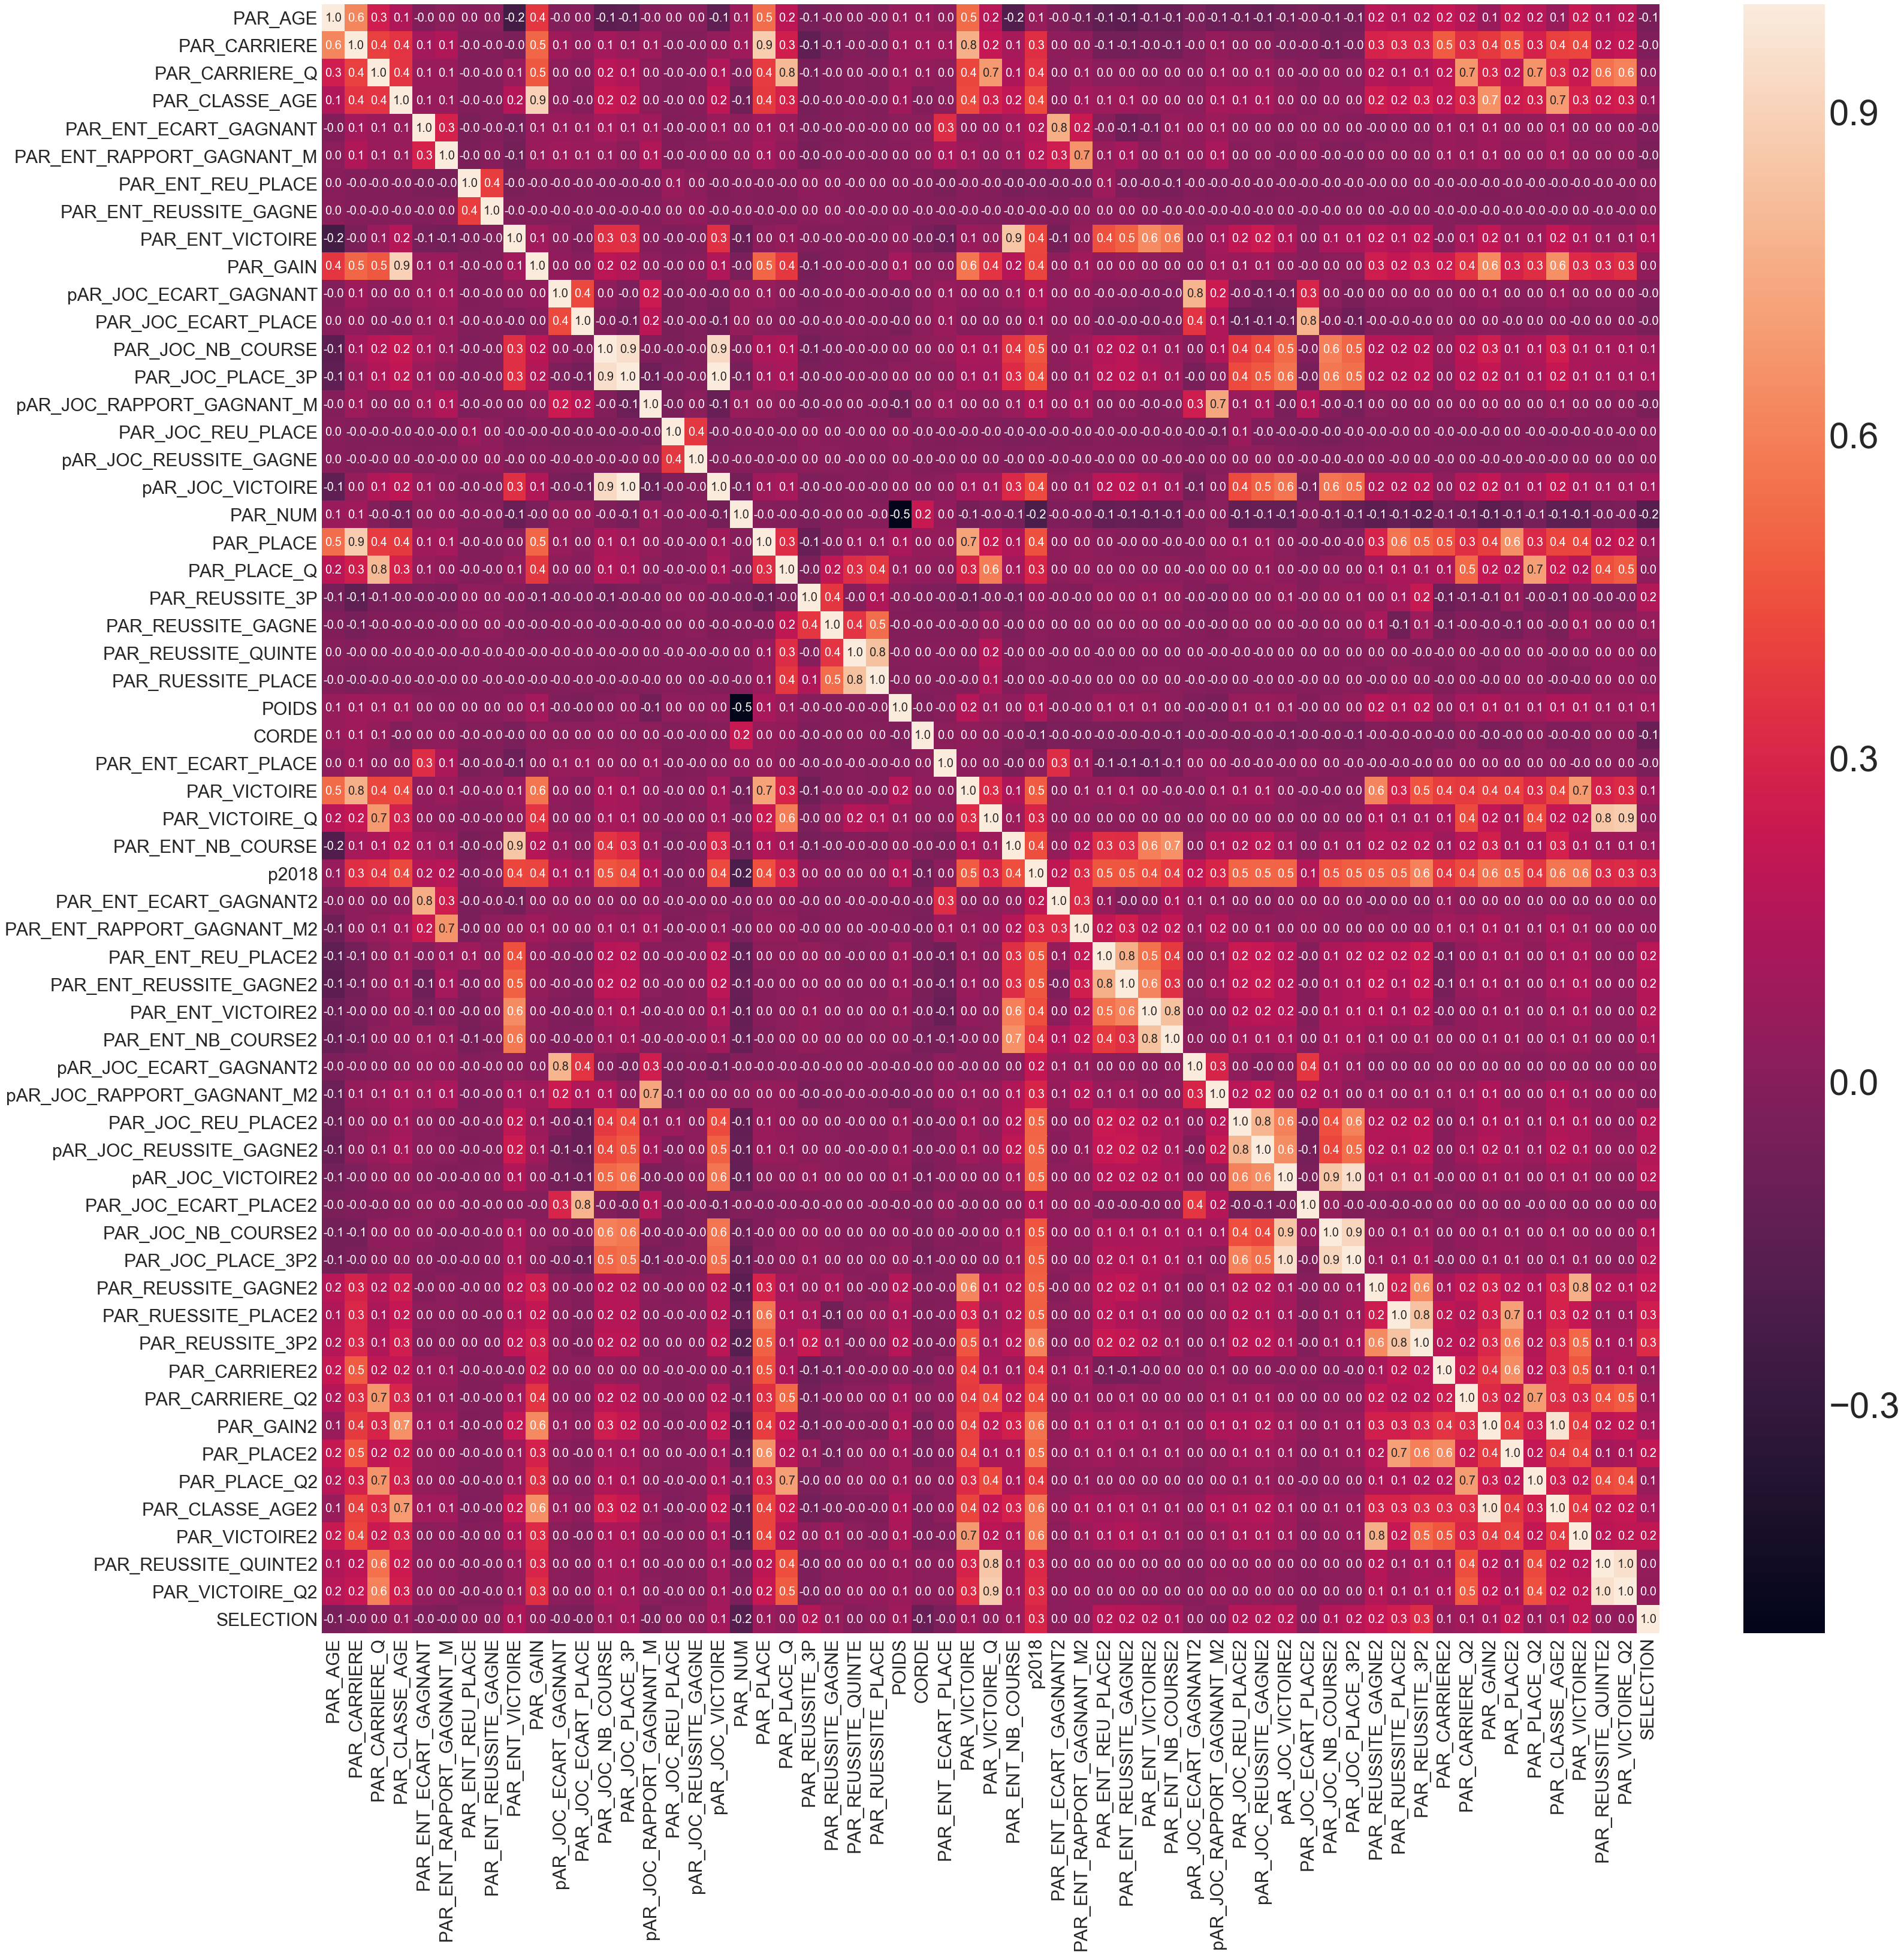

In [45]:
#Enfin, quelque chose de vraiment cool que vous pouvez mettre 

#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.

fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=6)
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".1f", linewidths=.0, ax=ax, annot_kws={"size": 20}, xticklabels = 1 )


Proportion: 1.74 : 1
Total number of records : 139555 
Nombre de participations avec SELECTION = 0 : 88653
Nombre de participations avec SELECTION = 1  : 50902
Pourcentage 0: 63.5255%,  pourcentage 1 : 36.4745%


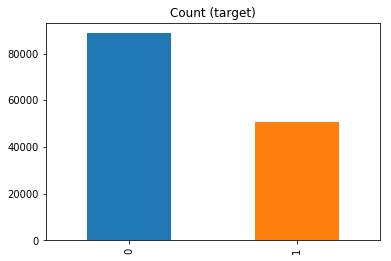

In [29]:
target_count = df_gagnant['SELECTION'].value_counts()


print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)')

normal_trans_perc = sum(df_gagnant['SELECTION'] == 0) / (sum(df_gagnant['SELECTION'] == 0) + sum(df_gagnant['SELECTION'] == 1))
fraud_trans_perc = 1 - normal_trans_perc
print('Total number of records : {} '.format(len(df_gagnant)))
print('Nombre de participations avec SELECTION = 0 : {}'.format(sum(df_gagnant['SELECTION'] == 0)))
print('Nombre de participations avec SELECTION = 1  : {}'.format(sum(df_gagnant['SELECTION'] == 1)))
print('Pourcentage 0: {:.4f}%,  pourcentage 1 : {:.4f}%'.format(normal_trans_perc * 100,fraud_trans_perc * 100))




# Definition des set

In [70]:
def courbe_de_roc(model, test_x,test_y):
    from sklearn.metrics import roc_curve, auc

    probas = model.predict_proba(test_x)
    # probas est une matrice de deux colonnes avec la proabilités d'appartenance à chaque classe

    fpr, tpr, thresholds = roc_curve(test_y, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
        
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")   
    
def plot_importance(feature_columns, model):
    importances = pd.DataFrame({'feature': feature_columns, 'importance': np.round(model.feature_importances_, 3)})
    importances = importances.sort_values('importance', ascending=False).set_index('feature')
    print("")
    print( importances)
    importances.plot.bar()
    
    
def metrique_classe(y_pred,y_true,xclass):
    from imblearn.metrics import specificity_score
    from imblearn.metrics import sensitivity_score


    from imblearn.metrics import geometric_mean_score



    # La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.
    # La sensibilité quantifie la capacité à éviter les faux négatifs.tp


    # estimator issu de quelques FIT




    log.traceLogInfo("Sensibilité  du re-equilibrage des données sur le TEST")
    #log.traceLogInfo("Binary ",sensitivity_score(y_true, y_pred, average='binary', pos_label=xclass))

    log.traceLogInfo("La spécificité est intuitivement la capacité du classificateur à trouver tous les échantillons positifs")

    log.traceLogInfo("Binary ")
    log.traceLogInfo(specificity_score(y_true, y_pred, labels=None, pos_label=xclass, average='binary', sample_weight=None))




    print("\nCalculer la moyenne géométrique")
    print(geometric_mean_score(y_true, y_pred,labels=None, pos_label=xclass))

    print("\n Calculer  sensitivity score")
    print("La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.")
    print("La sensibilité quantifie la capacité à éviter les faux négatifs.")

    print(sensitivity_score(y_true, y_pred, labels=None, pos_label=xclass,average='binary'))

In [47]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_gagnant[feature_columns],
                                                     df_gagnant[response_column], test_size=0.25, random_state=42)
train_eval_X =  df_gagnant[feature_columns]
train_eval_Y=  df_gagnant[response_column]





print("Train_x",train_x.shape)
print("Train y",train_y.shape)
print("Test x",test_x.shape)
print("Test y",test_y.shape)

print("train_eval_X",train_eval_X.shape)
print("train_eval_Y",train_eval_Y.shape)

print("Test x",test_x.shape)
print("Test y",test_y.shape)

test_y = test_y['SELECTION'].ravel()
train_y = train_y['SELECTION'].ravel()



def smot2(train_x,train_y,feature_columns):
    start_time=timer()
    from imblearn.combine import SMOTEENN
    from imblearn.over_sampling import SMOTE


    #print('\nOriginal dataset shape {}'.format(Counter(train_y)))
    sm = SMOTEENN(ratio='minority',n_jobs=3,random_state=42,
                         n_neighbors=5,smote=SMOTE())
    
    sm = SMOTE(ratio='minority', n_jobs=3, random_state=42,m_neighbors=200)


    X_res, y_res = sm.fit_sample(train_x, train_y)



    train_x = pd.DataFrame(X_res, columns=feature_columns)
    train_y = pd.Series(y_res)
    print("Fin SMOT")
    timer(start_time)


    return train_x,train_y





Train_x (104666, 58)
Train y (104666, 1)
Test x (34889, 58)
Test y (34889, 1)
train_eval_X (139555, 58)
train_eval_Y (139555, 1)
Test x (34889, 58)
Test y (34889, 1)


In [72]:
silence_esti=False

train_x, train_y = smot2(train_x=train_x, train_y=train_y, feature_columns=feature_columns)
test_x, test_y = smot2(train_x=test_x, train_y=test_y, feature_columns=feature_columns)


2018-07-06 00:58:30.425527
Fin SMOT

 Time taken: 0 hours 0 minutes and 0.07 seconds.
2018-07-06 00:58:30.498306
Fin SMOT

 Time taken: 0 hours 0 minutes and 0.59 seconds.


In [81]:

if allure_etudier == 1:
                  estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.04,
       max_delta_step=3, max_depth=11, max_features='sqrt',
       min_child_weight=6, n_estimators=1800, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=1e-05, reg_lambda=5.0, scale_pos_weight=1, seed=80,
       silent=False, subsample=1)
if allure_etudier == 3:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.9, gamma=0.3, learning_rate=0.07,
                max_delta_step=4, max_depth=9, max_features='sqrt',
                min_child_weight=13, n_estimators=1000, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=10,
                reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=400,
                silent=True, subsample=0.9)

if allure_etudier == 2:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.07,
       max_delta_step=8, max_depth=7, max_features='sqrt',
       min_child_weight=2, n_estimators=1000, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=10,
       reg_alpha=1e-05, reg_lambda=3, scale_pos_weight=6, seed=1090,
       silent=False, subsample=1)

if allure_etudier == 4:
                 estimator =  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.6, gamma=0.1, learning_rate=0.07,
                max_delta_step=0, max_depth=9, max_features='sqrt',
                min_child_weight=14, n_estimators=100, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=10,
                reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=27,
                silent=True, subsample=0.9)

if allure_etudier == 5:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bytree=0.6, gamma=0.1, learning_rate=0.07,
                       max_delta_step=0, max_depth=9, max_features='sqrt',
                       min_child_weight=12, n_estimators=100, n_jobs=1,
                       nthread=None, objective='binary:logistic', random_state=10,
                       reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=27,
                       silent=True, subsample=0.9)

        
model=estimator


In [82]:
start_time=timer()
eval_set = [(train_x, train_y), (test_x, test_y)]
model.fit(train_x, train_y, eval_metric=["error", "auc"], eval_set=eval_set, verbose=True, early_stopping_rounds=50)

print("***********")
timer(start_time)          

2018-07-06 01:04:34.284629
[0]	validation_0-error:0.463814	validation_0-auc:0.741351	validation_1-error:0.46632	validation_1-auc:0.736052
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-error:0.452472	validation_0-auc:0.776073	validation_1-error:0.455862	validation_1-auc:0.767312
[2]	validation_0-error:0.452674	validation_0-auc:0.784284	validation_1-error:0.455207	validation_1-auc:0.774482
[3]	validation_0-error:0.455057	validation_0-auc:0.78766	validation_1-error:0.458143	validation_1-auc:0.777716
[4]	validation_0-error:0.455471	validation_0-auc:0.792255	validation_1-error:0.457104	validation_1-auc:0.781593
[5]	validation_0-error:0.457402	validation_0-auc:0.795115	validation_1-error:0.459453	validation_1-auc:0.784694
[6]	validation_0-error:0.455666	validation_0-auc:0.79533	validation_1-error:0.457917	validation_1-auc:0.784449
[7]	validation_0-error:0.456034	val

[72]	validation_0-error:0.421533	validation_0-auc:0.864606	validation_1-error:0.426813	validation_1-auc:0.845084
[73]	validation_0-error:0.420954	validation_0-auc:0.865237	validation_1-error:0.426158	validation_1-auc:0.845573
[74]	validation_0-error:0.420555	validation_0-auc:0.865781	validation_1-error:0.425977	validation_1-auc:0.845931
[75]	validation_0-error:0.419909	validation_0-auc:0.865942	validation_1-error:0.42539	validation_1-auc:0.846069
[76]	validation_0-error:0.419375	validation_0-auc:0.866487	validation_1-error:0.42487	validation_1-auc:0.846574
[77]	validation_0-error:0.419007	validation_0-auc:0.866906	validation_1-error:0.424689	validation_1-auc:0.846919
[78]	validation_0-error:0.418669	validation_0-auc:0.8673	validation_1-error:0.424464	validation_1-auc:0.847052
[79]	validation_0-error:0.417924	validation_0-auc:0.86799	validation_1-error:0.423628	validation_1-auc:0.847574
[80]	validation_0-error:0.417128	validation_0-auc:0.868608	validation_1-error:0.422973	validation_1-a

[145]	validation_0-error:0.388669	validation_0-auc:0.887242	validation_1-error:0.400474	validation_1-auc:0.856801
[146]	validation_0-error:0.388474	validation_0-auc:0.887471	validation_1-error:0.400271	validation_1-auc:0.856858
[147]	validation_0-error:0.388143	validation_0-auc:0.887661	validation_1-error:0.400113	validation_1-auc:0.856868
[148]	validation_0-error:0.38788	validation_0-auc:0.887845	validation_1-error:0.400136	validation_1-auc:0.856862
[149]	validation_0-error:0.387564	validation_0-auc:0.887932	validation_1-error:0.4	validation_1-auc:0.856908
[150]	validation_0-error:0.387294	validation_0-auc:0.888197	validation_1-error:0.400023	validation_1-auc:0.856939
[151]	validation_0-error:0.387068	validation_0-auc:0.888403	validation_1-error:0.399932	validation_1-auc:0.85697
[152]	validation_0-error:0.386873	validation_0-auc:0.88848	validation_1-error:0.399752	validation_1-auc:0.856991
[153]	validation_0-error:0.386655	validation_0-auc:0.888567	validation_1-error:0.399684	validati

[218]	validation_0-error:0.374553	validation_0-auc:0.895998	validation_1-error:0.39372	validation_1-auc:0.857986
[219]	validation_0-error:0.374372	validation_0-auc:0.896219	validation_1-error:0.393743	validation_1-auc:0.858033
[220]	validation_0-error:0.374245	validation_0-auc:0.896243	validation_1-error:0.393675	validation_1-auc:0.858037
[221]	validation_0-error:0.374124	validation_0-auc:0.896398	validation_1-error:0.393472	validation_1-auc:0.858067
[222]	validation_0-error:0.374027	validation_0-auc:0.896463	validation_1-error:0.393517	validation_1-auc:0.858069
[223]	validation_0-error:0.373824	validation_0-auc:0.896789	validation_1-error:0.393246	validation_1-auc:0.858067
[224]	validation_0-error:0.37341	validation_0-auc:0.897007	validation_1-error:0.393043	validation_1-auc:0.858091
[225]	validation_0-error:0.37335	validation_0-auc:0.897015	validation_1-error:0.392975	validation_1-auc:0.858083
[226]	validation_0-error:0.373117	validation_0-auc:0.897188	validation_1-error:0.39302	vali

[291]	validation_0-error:0.364135	validation_0-auc:0.903003	validation_1-error:0.388276	validation_1-auc:0.858342
[292]	validation_0-error:0.364059	validation_0-auc:0.903061	validation_1-error:0.388209	validation_1-auc:0.858367
[293]	validation_0-error:0.363962	validation_0-auc:0.903191	validation_1-error:0.388118	validation_1-auc:0.858367
[294]	validation_0-error:0.363796	validation_0-auc:0.903251	validation_1-error:0.387983	validation_1-auc:0.85838
[295]	validation_0-error:0.363661	validation_0-auc:0.903455	validation_1-error:0.387712	validation_1-auc:0.858418
[296]	validation_0-error:0.363511	validation_0-auc:0.903519	validation_1-error:0.387599	validation_1-auc:0.85843
[297]	validation_0-error:0.363428	validation_0-auc:0.903691	validation_1-error:0.387599	validation_1-auc:0.858427
[298]	validation_0-error:0.363375	validation_0-auc:0.903704	validation_1-error:0.387599	validation_1-auc:0.858424
[299]	validation_0-error:0.36336	validation_0-auc:0.90373	validation_1-error:0.387599	vali

[364]	validation_0-error:0.352499	validation_0-auc:0.910264	validation_1-error:0.382426	validation_1-auc:0.858499
[365]	validation_0-error:0.352468	validation_0-auc:0.910341	validation_1-error:0.382403	validation_1-auc:0.858486
[366]	validation_0-error:0.352461	validation_0-auc:0.910419	validation_1-error:0.382155	validation_1-auc:0.858492
[367]	validation_0-error:0.352198	validation_0-auc:0.910527	validation_1-error:0.3822	validation_1-auc:0.858481
[368]	validation_0-error:0.352115	validation_0-auc:0.910592	validation_1-error:0.382132	validation_1-auc:0.858477
[369]	validation_0-error:0.352025	validation_0-auc:0.910654	validation_1-error:0.382042	validation_1-auc:0.858486
[370]	validation_0-error:0.351822	validation_0-auc:0.910733	validation_1-error:0.381952	validation_1-auc:0.858476
[371]	validation_0-error:0.351574	validation_0-auc:0.910895	validation_1-error:0.382178	validation_1-auc:0.858472
[372]	validation_0-error:0.351521	validation_0-auc:0.910916	validation_1-error:0.382065	va

In [83]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
PROBA = model.predict_proba(test_x)

In [84]:
 # evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print(">>>>>>>>>>  Accuracy: %.2f%%" % (accuracy * 100.0))

>>>>>>>>>>  Accuracy: 61.93%


In [85]:
print(classification_report(test_y, predictions))

             precision    recall  f1-score   support

          0       0.89      0.27      0.42     22135
          1       0.57      0.96      0.72     22135

avg / total       0.73      0.62      0.57     44270



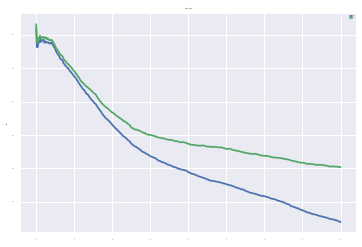

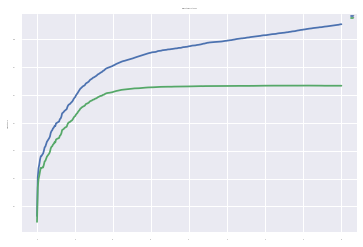

In [86]:
sns.set(font_scale=0.1)


        # retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

 # plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('auc')
pyplot.title('XGBoost auc')
pyplot.show()

        # plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

        #Plot_predictor_importance(best_model=model, feature_columns=featurecolums)




                            importance
feature                               
POIDS                            0.054
p2018                            0.039
PAR_CARRIERE                     0.036
PAR_REUSSITE_3P2                 0.034
PAR_NUM                          0.033
CORDE                            0.031
PAR_ENT_REU_PLACE2               0.029
PAR_ENT_NB_COURSE                0.028
PAR_RUESSITE_PLACE2              0.027
PAR_JOC_NB_COURSE2               0.027
pAR_JOC_RAPPORT_GAGNANT_M2       0.026
PAR_JOC_PLACE_3P2                0.025
PAR_JOC_NB_COURSE                0.025
PAR_CARRIERE2                    0.024
PAR_CLASSE_AGE                   0.024
PAR_ENT_RAPPORT_GAGNANT_M2       0.023
PAR_JOC_REU_PLACE2               0.023
PAR_PLACE2                       0.022
PAR_REUSSITE_GAGNE2              0.022
PAR_GAIN                         0.021
PAR_ENT_REUSSITE_GAGNE2          0.021
PAR_ENT_NB_COURSE2               0.021
PAR_AGE                          0.021
PAR_ENT_RAPPORT_GAGNANT_

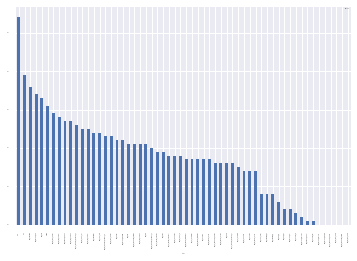

In [87]:
plot_importance(feature_columns=feature_columns,model=model)